In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
pd.set_option("display.width",500)
pd.set_option("display.max_columns",None)

In [2]:
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:

cat_cols = [col for col in df.columns if str(df[col].dtype) in ["category" , "object","bool"]]
num_but_cat =[col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int","float"]]
cat_but_car = [col for col in df.columns if df[col].nunique()>20 and str(df[col].dtypes) in ["category","object"]]
cat_cols = cat_cols + num_but_cat
cat_cols =[col for col in cat_cols if col not in cat_but_car]
df[cat_cols].nunique()
[col for col in df.columns if col not in cat_cols]


['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302


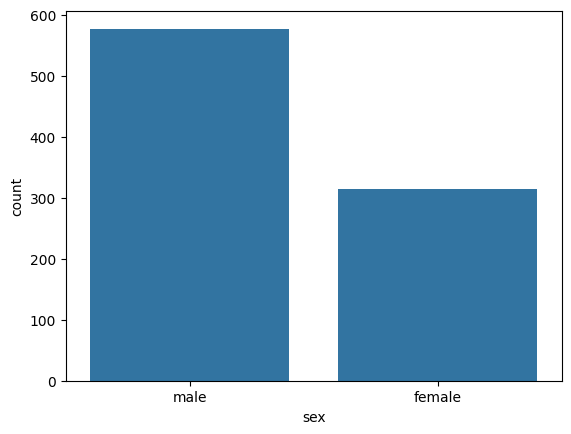

In [9]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio" : 100*dataframe[col_name].value_counts() / len(dataframe)}))
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)
cat_summary(df, "sex",plot=True)